### Actividad 6 - Punto 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Importar Dataset

El dataset corresponde a los registros de un dispositivo FreeStyle de medicion continua de glucosa de los meses de Mayo y Junio.

Se establecio un rango aceptable del nivel de glucosa entre **70-180** y se procedio al etiquetado de dichos registros con **glucose_level_type = 0**, siendo para cualquier otro nivel de glucosa fuera de dicho rango el **glucose_level_type = 1**



In [2]:
# importar el archivo .csv
data = pd.read_csv('glucosa-freestyle.csv')

In [3]:
data.head(5)


,Dispositivo,serial_number,time,record_type,glucose_level,glucose_level_type
0,FreeStyle Libre,JCGB319-K0305,1/5/2022 14:07,0,42,1
1,FreeStyle Libre,JCGB319-K0305,1/5/2022 14:22,0,63,1
2,FreeStyle Libre,JCGB319-K0305,1/5/2022 14:37,0,119,0
3,FreeStyle Libre,JCGB319-K0305,1/5/2022 14:52,0,135,0
4,FreeStyle Libre,JCGB319-K0305,1/5/2022 15:07,0,144,0


In [4]:
# crear un dataframe con las columnas glucose_level y glucose_level_type
df = pd.DataFrame(data, columns=['glucose_level','glucose_level_type'])

#### Analisis de los datos

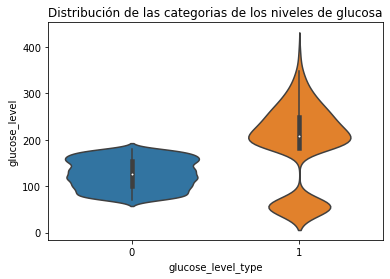

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.violinplot(
        x     = 'glucose_level_type',
        y     = 'glucose_level',
        data  = df,
        ax    = ax
    )

ax.set_title('Distribución de las categorias de los niveles de glucosa');

#### Separacion de los datos 

In [6]:
nivel_glucosa = df.iloc[:, 0].to_numpy()
tipo_nivel_glucosa = df.iloc[:, 1].to_numpy()

In [7]:
# separacion de los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(nivel_glucosa,tipo_nivel_glucosa, train_size = 0.8 )

#### Creacion del modelo de Regresion Logistica

In [8]:
# instancia del modelo de regresion logistica
modelo = LogisticRegression()

In [9]:
# entrenamiento del modelo
modelo_entrenado = modelo.fit(X = x_train.reshape(-1, 1), y = y_train)

In [10]:
# prediccion del tipo de nivel de glucosa usando los datos de prueba
y_pred = modelo_entrenado.predict(x_test.reshape(-1, 1))

#### Evaluacion del Modelo

In [11]:
# uso de la matriz de confusion para evaluacion del modelo
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[471,  78],
       [133, 431]], dtype=int64)

Text(0.5, 15.0, 'Valor Predecido')

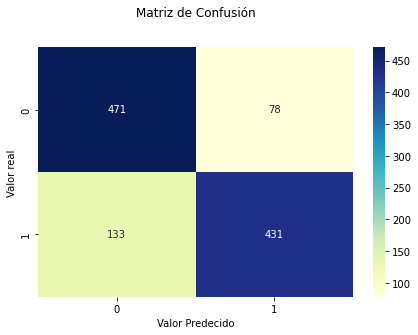

In [12]:
# grafico de la matriz de confusion
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')

In [13]:
print("Aciertos:",metrics.accuracy_score(y_test, y_pred))
print("Precisión:",metrics.precision_score(y_test, y_pred))

Aciertos: 0.8104222821203954
Precisión: 0.8467583497053045
